<a href="https://colab.research.google.com/github/DeenoBajithaCode/hierarchical-customer-segmentation/blob/main/hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
customer_data = pd.read_csv('/content/drive/MyDrive/partitioning/Customer shopping data.csv')
customer_data.shape


(200, 5)

In [3]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Exclude Region and Channel
data = customer_data.drop(['CustomerID', 'Genre', 'Age'], axis=1)
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


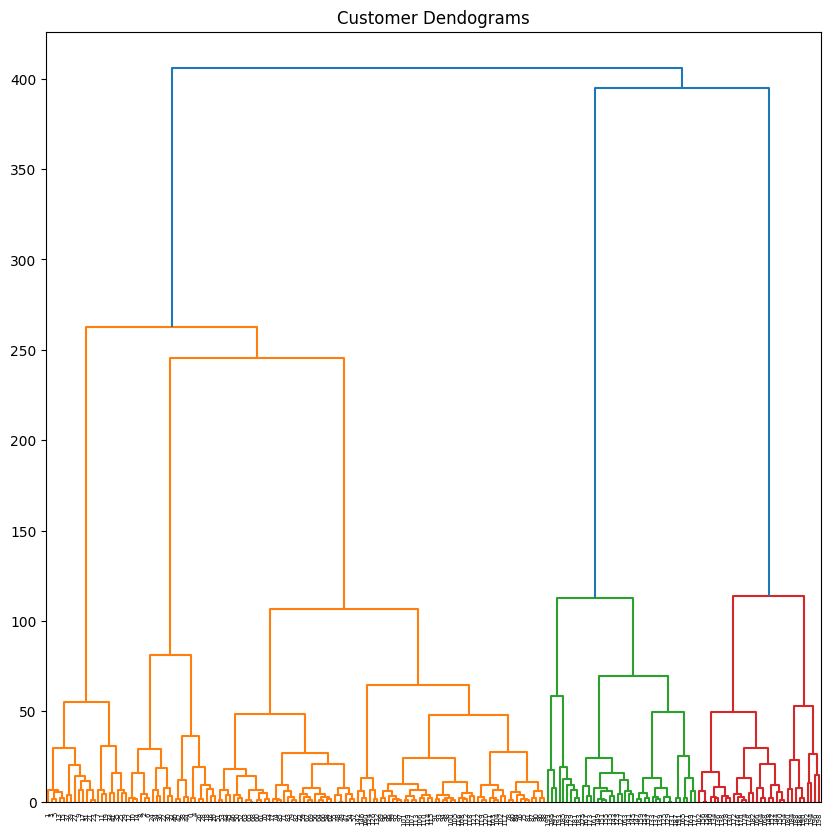

In [5]:
# import the SciPy library and the hierarchal clustering package
import scipy.cluster.hierarchy as shc

# specify the size of your figure and add a title
plt.figure(figsize=(10, 10))
plt.title("Customer Dendograms")

# plot the dendrogram
dendrogram = shc.dendrogram(shc.linkage(data, method='ward'))

In [6]:
# import and instantiate the bottom-up hierarchal clustering algorithm
from sklearn.cluster import AgglomerativeClustering

#specify the linkage and number of clusters hyperparameters
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')

# build your clustering model
agglomerative_model = cluster.fit(data)
agglomerative_model


AgglomerativeClustering(n_clusters=5)

In [7]:
customers_lables = agglomerative_model.fit_predict(data)
customers_lables


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [8]:
# Create a new column with the clusters labels
data['Cluster'] = customers_lables
shuffled_data = data.sample(frac=1)
shuffled_data.head(10)


,Annual Income (k$),Spending Score (1-100),Cluster
50,42,52,1
159,78,73,2
164,85,26,0
76,54,53,1
106,63,50,1
16,21,35,4
55,43,41,1
3,16,77,3
91,59,41,1
95,60,52,1


In [9]:
# To find the count of customers within each cluster
data['Cluster'].value_counts()


,count
Cluster,
1,85
2,39
0,32
4,23
3,21


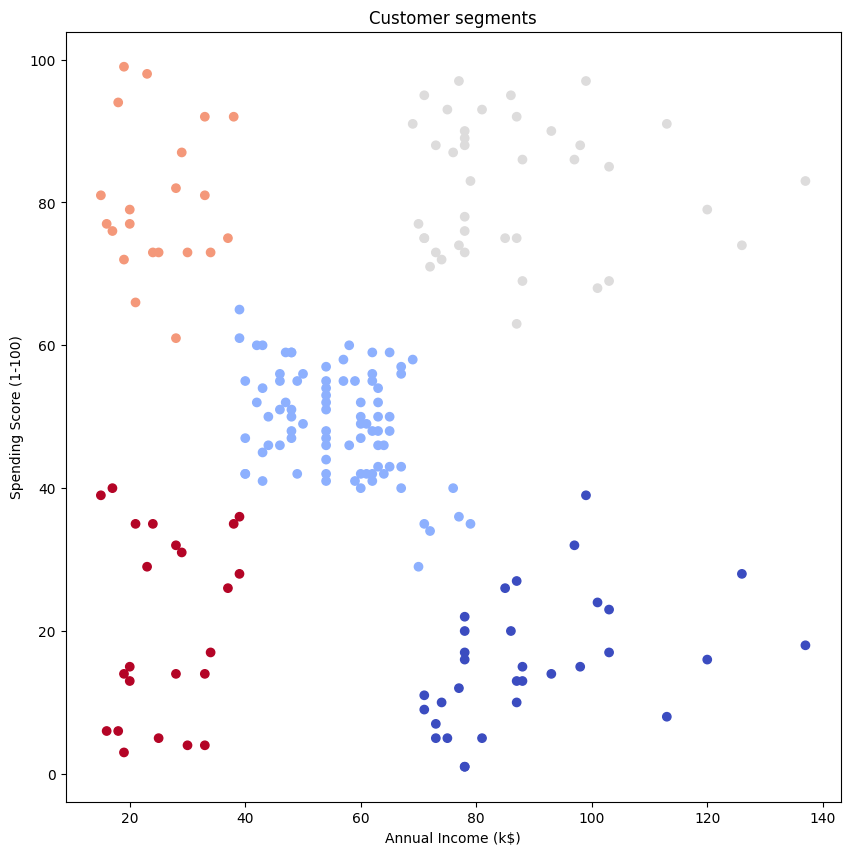

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = cluster.labels_, cmap='coolwarm')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer segments')
plt.show()